___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
# Import Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure & Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set_style("whitegrid")

# !pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

2022-11-03 15:40:32.936325: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-03 15:40:33.075819: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-03 15:40:33.075835: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-03 15:40:33.097425: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-03 15:40:33.560198: W tensorflow/stream_executor/platform/de

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [3]:
df = pd.read_csv("HR_Dataset.csv")

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Moreover, you can find the average of both the groups using groupby() and mean() function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [6]:
df.rename(columns={'Departments ': "departments" }, inplace=True)

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [8]:
from colorama import Fore, Back, Style

def first_looking(col):
    """give only column name as "col_name" not as df["col_name"]"""
    print(Back.BLACK + Fore.YELLOW, "Column name    : ", col, Style.RESET_ALL)
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("Value counts")
    print(df[col].value_counts(dropna = False))
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("Descriptive statistics")
    print(df[col].describe())
    print()
    print()

In [48]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [49]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [9]:
for col in df.columns:
    first_looking(col)

 Column name    :  satisfaction_level 
-------------------------------- 
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  92
-------------------------------- 
Value counts
0.100    358
0.110    335
0.740    257
0.770    252
0.840    247
0.730    246
0.780    241
0.370    241
0.820    241
0.890    237
0.830    234
0.760    234
0.720    230
0.500    229
0.660    228
0.750    226
0.870    225
0.910    224
0.430    224
0.800    222
0.810    220
0.900    220
0.590    219
0.790    217
0.440    211
0.570    210
0.400    209
0.630    209
0.490    209
0.690    209
0.610    208
0.850    207
0.700    205
0.450    203
0.960    203
0.860    200
0.650    199
0.920    198
0.520    196
0.090    195
0.600    193
0.380    189
0.620    188
0.510    187
0.880    187
0.640    187
0.560    187
0.540    185
0.980    183
0.580    182
0.950    181
0.550    179
0.530    179
0.670    177
0.970    176
0.390    175
0.990    172
0.710    171
0.410    171
0.930    169
0.940    167
0.680    162
0.420    

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

*Feel free to add more visualization

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

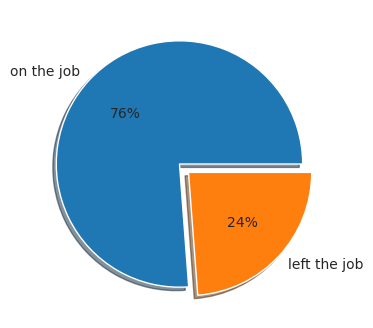

In [11]:
plt.figure(figsize=(4,4))
plt.pie(df.left.value_counts(normalize=True), labels=["on the job", "left the job"],shadow=True, explode=(0, 0.1), autopct='%.0f%%')
plt.show;

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

### Subplots of Features

You can use the methods of the matplotlib.

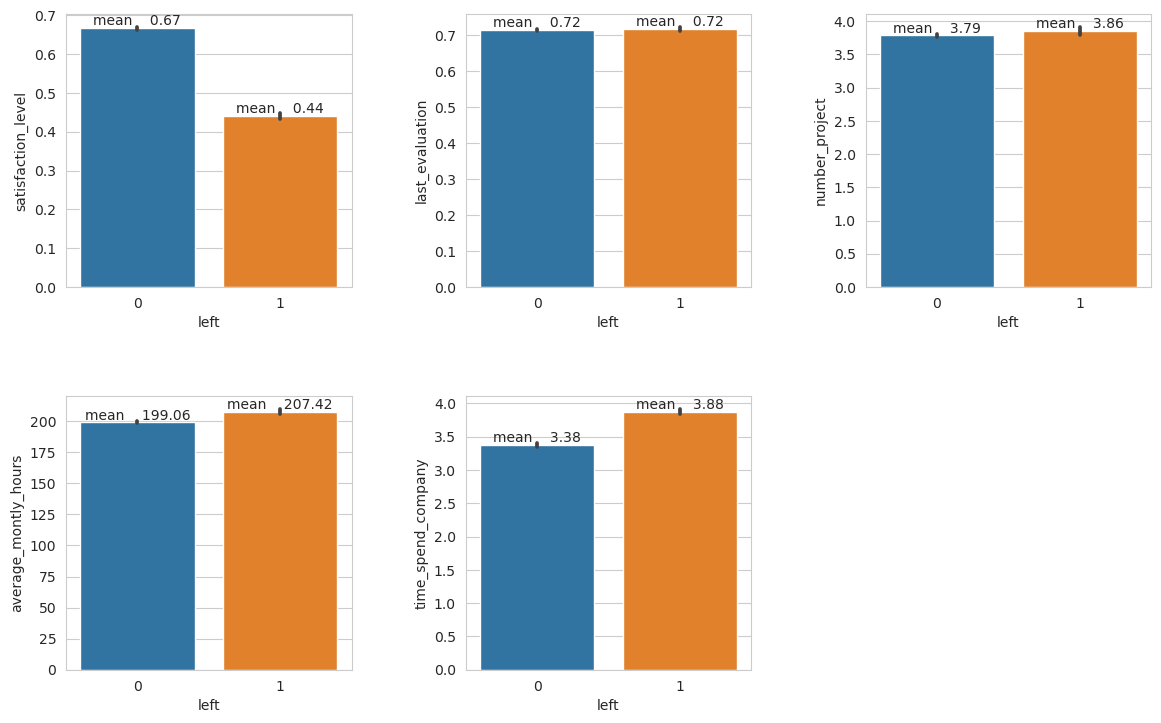

In [12]:
df_num = df.select_dtypes("number").drop(columns=["Work_accident", "promotion_last_5years" ])


plt.figure(figsize=(14,8))
i =1

for col in df_num.drop(columns = "left").columns:
    plt.subplot(2,3,i)
    ax = sns.barplot(data=df_num, x="left", y=col)
    ax.bar_label(ax.containers[0], fmt="mean    %.2f")
    i +=1;
    
plt.subplots_adjust(top=0.93, wspace=0.4, hspace=0.4)

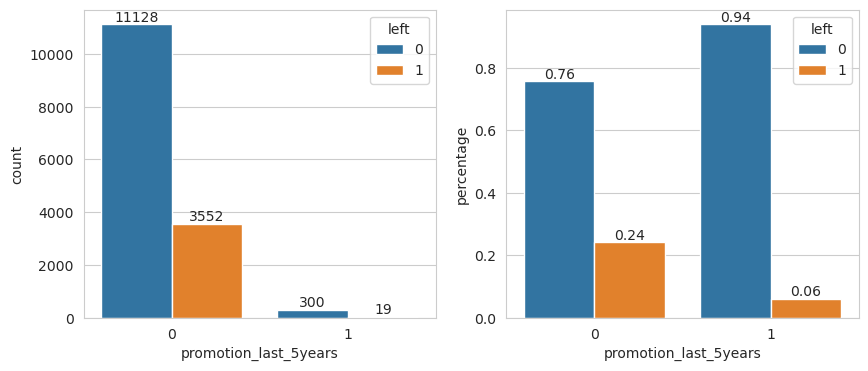

In [13]:
plt.figure(figsize=(10,4))

plt.subplot(121)
ax = sns.countplot(data=df, hue='left', x='promotion_last_5years');
for p in ax.containers:
    ax.bar_label(p)
    
df_per = df.groupby("promotion_last_5years")[["left"]].value_counts(normalize=True).reset_index().sort_values(by=0)

plt.subplot(122)
ax = sns.barplot(data=df_per, x="promotion_last_5years", y=0, hue="left",
                 order=(df.promotion_last_5years.value_counts().index)
                )
ax.set(ylabel='percentage')

for p in ax.containers:
    ax.bar_label(p, fmt='%.2f')

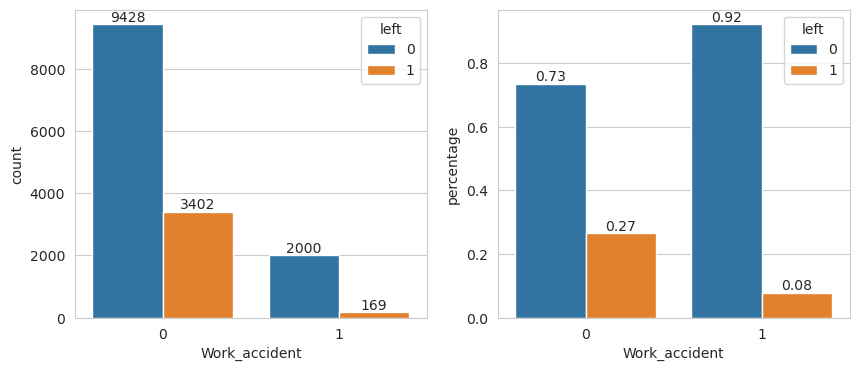

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(121)
ax = sns.countplot(data=df, x='Work_accident', hue='left');
for p in ax.containers:
    ax.bar_label(p)
    
plt.subplot(122)

df_per = df.groupby("Work_accident")[["left"]].value_counts(normalize=True).reset_index().sort_values(by=0)

ax = sns.barplot(data=df_per, order=(df.Work_accident.value_counts().index), 
                hue="left", y=0, x="Work_accident")
ax.set(ylabel='percentage')

for p in ax.containers:
    ax.bar_label(p, fmt='%.2f')

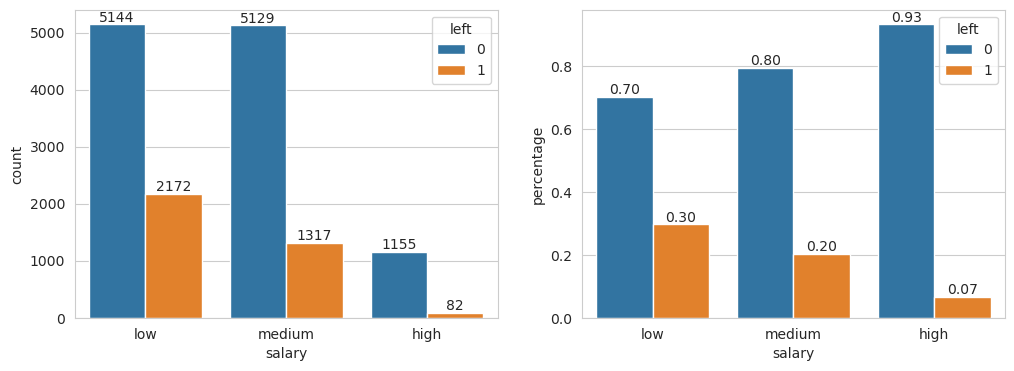

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(121)
ax = sns.countplot(data=df, hue='left', x='salary');
for p in ax.containers:
    ax.bar_label(p)
    
plt.subplot(122)

df_per = df.groupby("salary")[["left"]].value_counts(normalize=True).reset_index().sort_values(by=0)

ax = sns.barplot(data=df_per, order=(df.salary.value_counts().index), 
                x="salary", y=0, hue="left")
ax.set(ylabel='percentage')

for p in ax.containers:
    ax.bar_label(p, fmt='%.2f')

In [16]:
df.departments.value_counts()
#.index

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: departments, dtype: int64

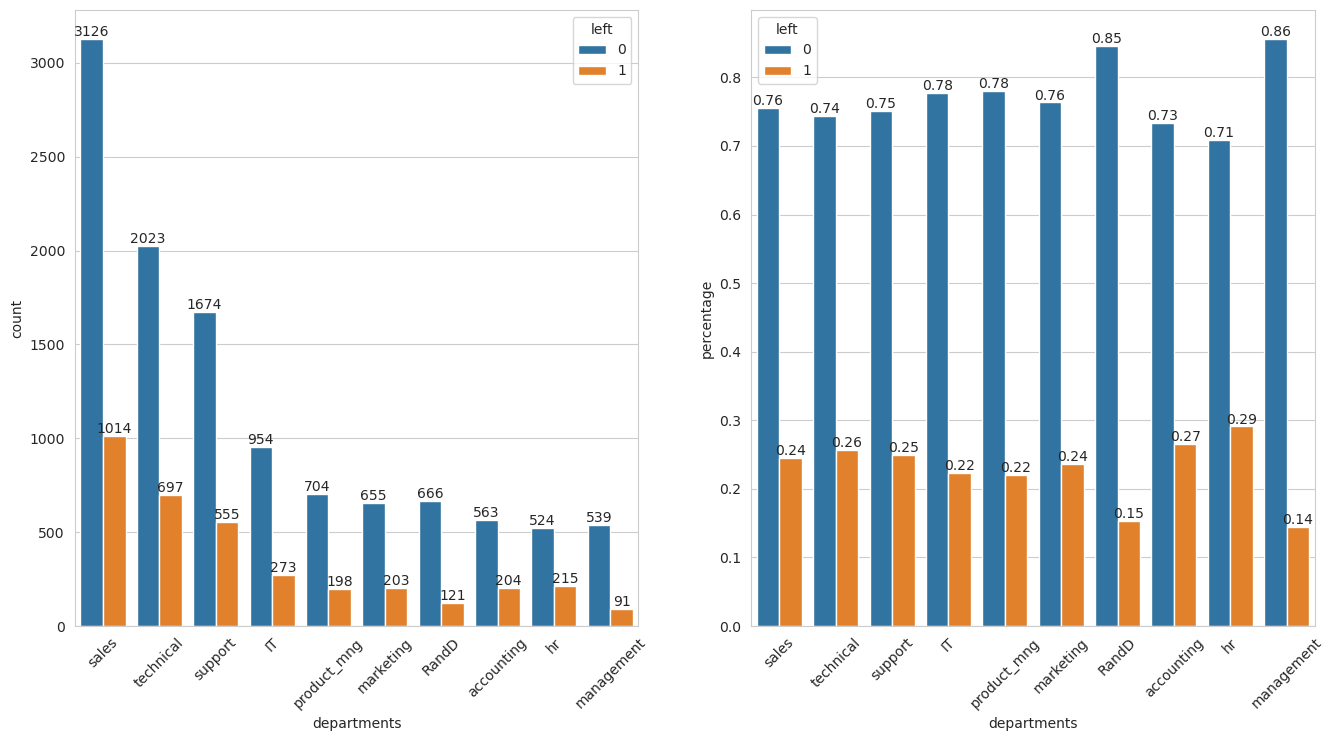

In [17]:
plt.figure(figsize=(16,8))

plt.subplot(121)
ax = sns.countplot(data=df, x='departments', hue='left',
                   order=(df.departments.value_counts().index));
plt.xticks(rotation=45)
for p in ax.containers:
    ax.bar_label(p)

    
df_per = df.groupby("departments")[["left"]].value_counts(normalize=True).reset_index().sort_values(by=0)

plt.subplot(122)
ax = sns.barplot(data=df_per, x="departments", y=0, hue="left",
                                    order=(df.departments.value_counts().index))
plt.xticks(rotation=45)
ax.set(ylabel='percentage')
for p in ax.containers:
    ax.bar_label(p, fmt='%.2f')



Text(0.5, 1.0, 'Correlation Matrix')

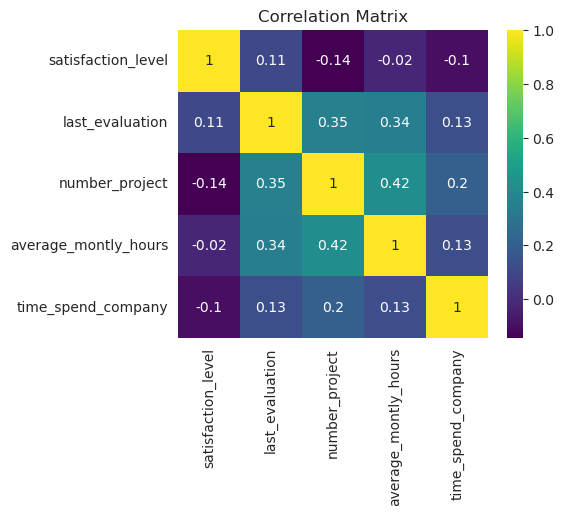

In [18]:
plt.figure(figsize=(5,4))
sns.heatmap(df_num.drop(columns="left").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

#### Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

## 5. Model Building

### Split Data as Train and Test Set

### #Distance Based(?) Algorithm

#### Model Building

#### Evaluating Model Performance and Tuning

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

#### Prediction

### #Random Forest Classifier

#### Model Building

In [19]:
X = df.drop(columns="left")
y = df['left']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [22]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departments,salary
5362,0.420,0.470,4,146,3,1,0,sales,medium
1257,0.880,0.920,4,233,6,0,0,technical,low
12387,0.100,0.970,6,247,4,0,0,management,medium
4375,0.720,0.930,4,174,2,0,0,sales,low
5452,0.500,0.730,4,271,2,0,0,hr,low
...,...,...,...,...,...,...,...,...,...
5695,0.610,0.720,3,144,2,0,0,support,low
8006,0.560,0.550,3,245,2,0,0,IT,medium
1361,0.750,0.890,5,272,5,0,0,IT,medium
1547,0.090,0.830,6,250,4,0,0,sales,medium


In [23]:
cat = X_train[['Work_accident', 'promotion_last_5years', 'departments', "salary"]].columns
cat

Index(['Work_accident', 'promotion_last_5years', 'departments', 'salary'], dtype='object')

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=101))]

pipe_RF = Pipeline(steps=operations)

pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Work_accident', 'promotion_last_5years', 'departments', 'salary'], dtype='object'))])),
                ('RF_model', RandomForestClassifier(random_state=101))])

#### Evaluating Model Performance and Tuning

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score,f1_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [27]:
eval_metric(pipe_RF, X_train, y_train, X_test, y_test)

Test_Set
[[2261    1]
 [  16  722]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2262
           1       1.00      0.98      0.99       738

    accuracy                           0.99      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000


Train_Set
[[9166    0]
 [   0 2833]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9166
           1       1.00      1.00      1.00      2833

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



In [28]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

In [29]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.567,0.020,0.993,0.996,0.972,0.984
2,0.545,0.020,0.991,0.989,0.972,0.980
3,0.539,0.020,0.994,0.996,0.979,0.988
4,0.533,0.019,0.989,1.000,0.954,0.976
5,0.530,0.020,0.990,0.996,0.961,0.978
6,0.532,0.020,0.989,0.993,0.961,0.977
7,0.585,0.023,0.989,1.000,0.954,0.977
8,0.581,0.020,0.994,1.000,0.975,0.988
9,0.600,0.023,0.992,0.986,0.979,0.982
10,0.586,0.023,0.995,0.996,0.982,0.989


In [30]:
RF_results = pd.DataFrame(df_scores.mean()[2:], columns=["RF"])
RF_results.T

,test_accuracy,test_precision,test_recall,test_f1
RF,0.992,0.995,0.969,0.982


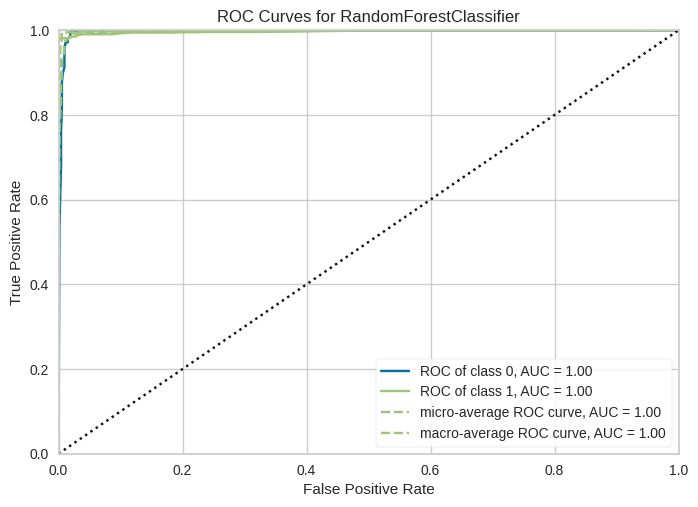

In [31]:
from yellowbrick.classifier import ROCAUC

model = pipe_RF
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();         

In [32]:
pipe_RF["RF_model"].feature_importances_ 

array([0.00611773, 0.00097857, 0.01304363, 0.0081922 , 0.34134277,
       0.12656571, 0.17986593, 0.14229349, 0.18159996])

In [33]:
X_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [34]:
features = list(X_train[cat].columns) + list(X_train.drop(columns=cat).columns)
features

['Work_accident',
 'promotion_last_5years',
 'departments',
 'salary',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company']

In [35]:
rf_feature_imp = pd.DataFrame(data = pipe_RF["RF_model"].feature_importances_, index = features, #index=X.columns
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
satisfaction_level,0.341
time_spend_company,0.182
number_project,0.180
average_montly_hours,0.142
last_evaluation,0.127
departments,0.013
salary,0.008
Work_accident,0.006
promotion_last_5years,0.001


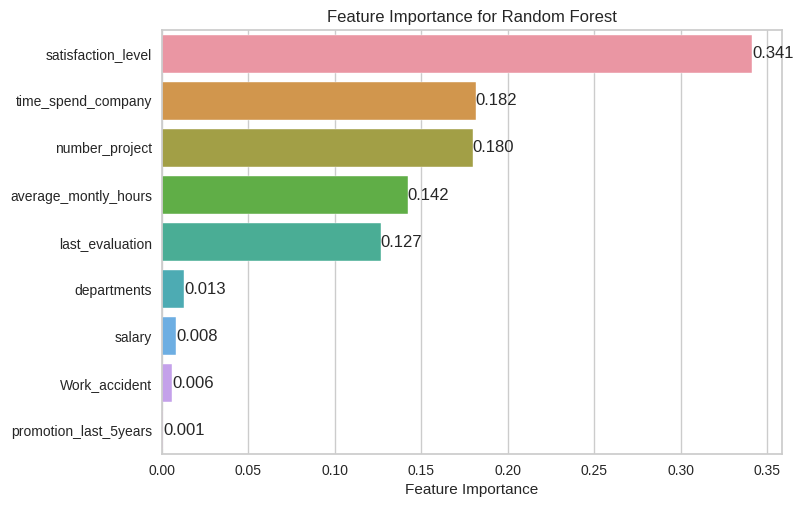

In [36]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

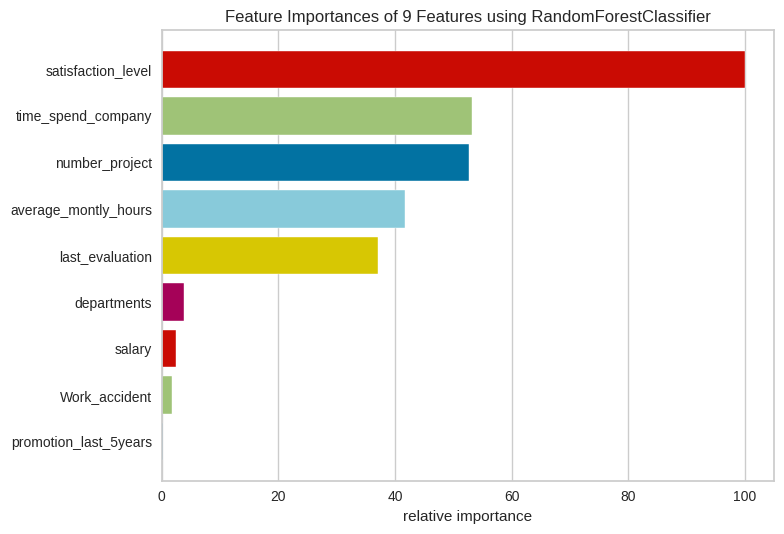

In [37]:
from yellowbrick.model_selection import FeatureImportances

model = pipe_RF["RF_model"]
viz = FeatureImportances(model, labels=features)
viz.fit(X_train, y_train)
viz.show();

#### Prediction

In [38]:
obs = df.sample(5)
obs

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
9021,0.450,0.460,3,179,2,1,0,0,sales,low
3032,0.930,0.940,4,188,3,0,0,0,support,medium
7312,0.510,0.780,3,155,2,0,0,0,management,low
9471,0.520,0.740,3,160,2,0,0,0,marketing,high
13225,0.520,0.890,3,188,6,0,0,0,marketing,medium


In [39]:
pipe_RF.predict(obs)

array([0, 0, 0, 0, 0])

In [40]:
import pickle
pickle.dump(pipe_RF, open("Random_Forest", 'wb'))

In [41]:
rf_model = pickle.load(open("Random_Forest", 'rb'))

In [42]:
obs = df.sample(5)
print(rf_model.predict(obs))
obs

[0 1 0 1 0]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
6813,0.170,0.570,5,286,3,0,0,0,sales,low
14719,0.380,0.550,2,158,3,0,1,0,support,low
13125,0.930,0.640,4,253,3,0,0,0,RandD,low
12541,0.810,0.870,4,254,5,0,1,0,marketing,low
6367,0.440,0.440,3,126,2,0,0,0,hr,medium


### #XGBoost Classifier

#### Model Building

#### Evaluating Model Performance and Tuning

#### Prediction

### #ANN Classifier

#### Layer Architecture Building and Compiling

#### Evaluating Model Performance and Tunning

#### Prediction

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model

### Save and Export Variables


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___